### STEP 2: Introducing and Loading the Dataset -- Esther

#### Installing and importing libraries

In [4]:
%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [15]:
# Load in the dataset from a csv
csv = pd.read_csv('data/creditcard.csv')

# Convert the data to a pandas dataframe
cc_data = pd.DataFrame(csv)

# Get the shape of the dataframe: (rows, columns)
cc_data.shape

(284807, 31)

In [16]:
# See the first five rows of the dataframe:
cc_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
205910,135967.0,0.062690,0.678567,-1.468860,-1.560020,3.194188,3.264803,0.435747,0.870444,-0.368149,...,-0.272509,-0.850037,0.071537,0.599335,-0.514333,0.148846,0.049529,0.074597,4.49,0
201611,133964.0,0.158362,1.225332,0.869701,2.458392,1.305696,0.438074,1.042112,-0.063737,-1.280418,...,-0.497356,-1.521247,0.159402,-1.246548,-0.857361,-0.668322,-0.122106,-0.171481,7.58,0
118220,74998.0,0.858278,-0.432435,0.349065,0.572747,0.217796,1.664819,-0.375621,0.602209,0.211650,...,-0.018132,0.066197,0.064401,-0.988854,0.074345,0.373416,0.029815,0.000391,81.34,0
199181,132844.0,0.037726,0.885038,0.297772,-0.596567,0.461205,-1.028412,1.026881,-0.201617,-0.097803,...,-0.250702,-0.519799,0.073256,-0.010947,-0.492770,0.142256,0.252461,0.097542,3.96,0
238158,149554.0,-4.982520,-7.003254,-0.933225,2.629323,4.375531,-2.457873,-3.098914,1.042842,0.276444,...,0.994589,0.061863,0.742641,-1.470329,-2.294274,-1.038241,0.404635,-0.741786,205.39,0


### STEP 3: Exploratory data analysis -- Ria

In [7]:
#recoding dataset 
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Fraud: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


In [ ]:
sns.countplot(data=df, x='Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## STEP 4: Data Cleaning and Initializing The Model with sklearn (no undersampling) -- MILLER

### Data splitting

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, Y_train, Y_test = train_test_split(df_no_dup['text'], 
                                                    df_no_dup['target'],
                                                    test_size=0.3,
                                                    random_state=0)

### Data preparation and data cleaning

In [18]:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase 
    text = re.sub(r"\d+","",text)   #remove digits and currencies 
    text = re.sub(r'[\$\d+\d+\$]', "", text)      
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates 
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks
    
    #remove stop words 
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)
        
    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)
    
    #stemming 
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)
    
    return text

In [81]:
#preprocessed data: Lemm + stopword removal 
preprocessed_text_1 = [text_clean(text, 'L', True) for text in X_train]
#preprocessed_text_1[0:10]

#preprocessed data: Lemm + no stopword removal 
preprocessed_text_2 = [text_clean(text, 'L', False) for text in X_train]
#preprocessed_text_2[0:10]

#preprocessed data: Stem + stopword removal 
preprocessed_text_3 = [text_clean(text, 'S', True) for text in X_train]
#preprocessed_text_3[0:10]

#preprocessed data: Stem + no stopword removal 
preprocessed_text_4 = [text_clean(text, 'S', False) for text in X_train]
#preprocessed_text_4[0:10]

### WE'RE USING RANDOM FORESTS AS OUR CLASSIFIER

In [125]:
def transform_model_data_w_count_vectorizer(preprocessed_text, Y_train,  X_test, Y_test):
    #vectorize dataset 
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_text)

    #define model
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_data, Y_train)

    #evaluate model
    predictions = model.predict(vectorizer.transform(X_test))
    accuracy = accuracy_score( Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    return predictions

In [129]:
def transform_model_data_w_tfidf_vectorizer(preprocessed_text, Y_train,  X_test, Y_test):
    #vectorize dataset 
    tfidf = TfidfVectorizer() 
    vectorized_data = tfidf.fit_transform(preprocessed_text)

    #define model
    model = MultinomialNB(alpha=0.1)
    model.fit(vectorized_data, Y_train)
 
    #evaluate model
    predictions = model.predict(tfidf.transform(X_test))

    accuracy = accuracy_score( Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print("Accuracy:",round(100*accuracy,2),'%')
    print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
    print("Precision:", round(100*precision,2),'%')
    return predictions

In [124]:
#vectorize, model, and evaluate model using CountVectorizer

#Lemm + stopword removal 
print("Lemm + stopword removal + CountVectorizer") 
transform_model_data_w_count_vectorizer(preprocessed_text_1, Y_train,  X_test, Y_test)

#Lemm + no stopword removal 
print("\nLemm + no stopword removal + CountVectorizer") 
transform_model_data_w_count_vectorizer(preprocessed_text_2, Y_train,  X_test, Y_test)

#Stem + stopword removal 
print("\nStem + stopword removal + CountVectorizer") 
transform_model_data_w_count_vectorizer(preprocessed_text_3, Y_train,  X_test, Y_test)

#Stem + no stopword removal 
print("\nStem + no stopword removal + CountVectorizer") 
transform_model_data_w_count_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Lemm + stopword removal + CountVectorizer
Accuracy: 97.55 %
Balanced accuracy: 94.57 %
Precision: 90.55 %

Lemm + no stopword removal + CountVectorizer
Accuracy: 97.42 %
Balanced accuracy: 93.86 %
Precision: 90.86 %

Stem + stopword removal + CountVectorizer
Accuracy: 96.91 %
Balanced accuracy: 90.6 %
Precision: 93.22 %

Stem + no stopword removal + CountVectorizer
Accuracy: 97.29 %
Balanced accuracy: 91.88 %
Precision: 93.92 %


In [120]:
#vectorize, model, and evaluate model using TfidfVectorizer

#Lemm + stopword removal 
print("Lemm + stopword removal + TfidfVectorizer") 
transform_model_data_w_tfidf_vectorizer(preprocessed_text_1, Y_train,  X_test, Y_test)

#Lemm + no stopword removal 
print("\nLemm + no stopword removal + TfidfVectorizer") 
transform_model_data_w_tfidf_vectorizer(preprocessed_text_2, Y_train,  X_test, Y_test)

#Stem + stopword removal 
print("\nStem + stopword removal + TfidfVectorizer") 
transform_model_data_w_tfidf_vectorizer(preprocessed_text_3, Y_train,  X_test, Y_test)

#Stem + no stopword removal 
print("\nStem + no stopword removal + TfidfVectorizer") 
transform_model_data_w_tfidf_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Lemm + stopword removal + TfidfVectorizer
Accuracy: 97.36 %
Balanced accuracy: 91.92 %
Precision: 94.44 %

Lemm + no stopword removal + TfidfVectorizer
Accuracy: 97.61 %
Balanced accuracy: 92.07 %
Precision: 96.59 %

Stem + stopword removal + TfidfVectorizer
Accuracy: 96.07 %
Balanced accuracy: 85.46 %
Precision: 97.95 %

Stem + no stopword removal + TfidfVectorizer
Accuracy: 96.45 %
Balanced accuracy: 86.53 %
Precision: 99.32 %


In [130]:
predictions = transform_model_data_w_tfidf_vectorizer(preprocessed_text_4, Y_train,  X_test, Y_test)

Accuracy: 96.45 %
Balanced accuracy: 86.53 %
Precision: 99.32 %


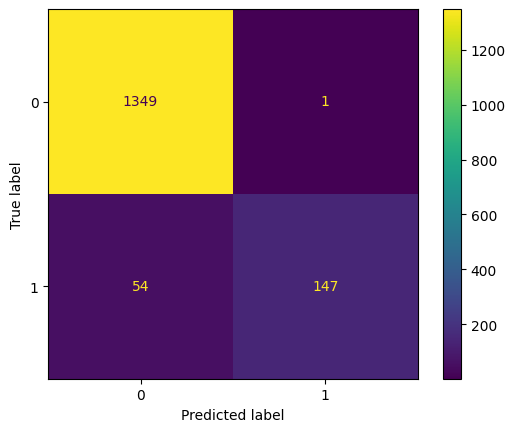

In [132]:
#compute the confusion matrix.
cm = confusion_matrix(Y_test, predictions)

 #Plot the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## STEP 4b: Evaluation with Performance Metrics -- Alyssa

## STEP 5: Undersampling Techniques -- Esther (just write the general blurb for this)

### Random Downsampling -- Esther

In [ ]:
fraud_df = cc_data.loc[cc_data['Class'] == 1]
non_fraud_df = cc_data.loc[cc_data['Class'] == 0][:492]
display(fraud_df.head())
display(non_fraud_df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Spam and Ham Stuff


In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df, x='Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
print('Top 5 common duplicate texts are:')
data[data.duplicates == 1].pivot_table(index='text', values='target', aggfunc='count').sort_values(by='target', ascending=False).head(5)

Top 5 common duplicate texts are:


,target
text,
"Sorry, I'll call later",30
I cant pick the phone right now. Pls send a message,12
Ok...,10
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4


In [ ]:
#check for missing data
print("Missing data in each column:\n" + str(data.isnull().sum()))

Missing data in each column:
classification    0
text              0
target            0
duplicates        0
dtype: int64


In [ ]:
data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [ ]:
# Explore distribution of dataset 

# count plot on single categorical variable
ax = sns.countplot(x = data['classification'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

Note: Distribution of dataset indicates imbalanced data.

In [ ]:
# Dropping all duplicate texts based off of results of EDA
df_no_dup = data.drop_duplicates(subset=['text'], keep='first')

In [ ]:
# Explore distribution of dataset 

# count plot on single categorical variable
ax = sns.countplot(x = df_no_dup['classification'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

###  Near Miss Undersampling -- Ria

In [1]:
from imblearn.under_sampling import NearMiss

#Splitting the data into features and labels 
X = cc_data.iloc[:,:30]
y = cc_data.iloc[:, 30]

near_miss = NearMiss()
X_resample, y_resample = near_miss.fit_resample(X,y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0))) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_resample == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_resample == 0))) 

In [1]:
#Creating the classifier 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X_resample, y_resample, test_size=0.2, random_state=45)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

score = model.score(X_val, y_val)


### Tomek Link Undersampling -- Miller